<a href="https://colab.research.google.com/github/kameshcodes/deep-learning-codes/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## $\textbf{1. Load Libraries and and Simulate Data}$

In [1]:
import numpy as np
import pandas as pd

In [2]:
def load_data_from(data_path):
  return pd.read_csv(data_path)

In [3]:
n_samples = 100
X1 = np.random.rand(n_samples) * 10
X2 = np.random.rand(n_samples) * 5
X3 = np.random.rand(n_samples) * 2

# Create a linear relationship with some noise
y = 3 + 1.5 * X1 + 2 * X2 - 1 * X3 + np.random.randn(n_samples) * 1.5

In [4]:
train = pd.DataFrame({
    'Feature1': X1,
    'Feature2': X2,
    'Feature3': X3,
    'Target': y
})

In [5]:
train.head()

,Feature1,Feature2,Feature3,Target
0,6.452462,3.869064,0.588418,20.836383
1,8.447514,0.884360,1.869522,18.190503
2,3.361969,0.722319,0.410301,9.459312
3,6.645695,2.753296,1.708782,17.430680
4,9.392213,3.036966,0.254361,21.165199


## $\textbf{2. Make Regression Function}$

In [6]:
from scipy import stats


def add_intercept_feature_one(X):
  X['One'] = 1
  return X


def fit(X, y, intercept = True):
  if intercept:
        X = add_intercept_feature_one(X)

  X = np.array(X)
  y= np.array(y)

  XTX= np.dot(X.T,X)
  XTX_inv = np.linalg.inv(XTX)
  XTy = np.dot(X.T, y)
  betas = np.dot(XTX_inv, XTy)
  return betas


def predict(X, betas):
  return np.dot(X, betas)


def mean_square_error(y, y_pred):
  y = np.array(y)
  return np.mean((y-y_pred)**2)


def calculate_p_values(X, y, betas):
    n = X.shape[0]
    k = X.shape[1]

    y_pred = np.dot(X, betas)
    residuals = y - y_pred

    residual_variance = np.sum(residuals**2) / (n - k)
    XTX_inv = np.linalg.inv(np.dot(X.T, X))

    standard_errors = np.sqrt(np.diagonal(residual_variance * XTX_inv))


    t_stats = betas / standard_errors
    p_values = [2 * (1 - stats.t.cdf(np.abs(t), df=n - k)) for t in t_stats]

    p_val = pd.DataFrame({
    'Feature': X.columns,
    'coefficient': betas,
    'p-values': p_values
    })
    return p_val, residuals

In [7]:
X = train.drop(['Target'], axis = 1)
y = train['Target']

In [8]:
betas = fit(X,y)

print('betas:', betas)

betas: [ 1.47924418  1.89837201 -1.47582402  3.99986327]


## $\textbf{3. Sklearn Regression}$

In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X, y)

LinearRegression()

### 3.1 Model Coefficients Comparison

In [10]:
print('Our betas: ', betas)

Our betas:  [ 1.47924418  1.89837201 -1.47582402  3.99986327]


In [11]:
sklearn_betas = np.hstack((model.coef_[:-1],model.intercept_))
print('Sklearn betas: ', sklearn_betas)

Sklearn betas:  [ 1.47924418  1.89837201 -1.47582402  3.99986327]


In [12]:
sklearn_betas = np.hstack((model.coef_[:-1],model.intercept_))

print("\nAvg Mean Squared Diff between our betas and Sklearn Implementation betas:",
      mean_square_error(betas, sklearn_betas))


Avg Mean Squared Diff between our betas and Sklearn Implementation betas: 1.985427312973202e-27


In [13]:
p_val, residuals = calculate_p_values(X, y, betas)
p_val

,Feature,coefficient,p-values
0,Feature1,1.479244,0.000000e+00
1,Feature2,1.898372,0.000000e+00
2,Feature3,-1.475824,9.316852e-10
3,One,3.999863,1.110223e-15


### 3.2 Training MSE

In [14]:
y_pr = model.predict(X)

print('Sklearn Ceoffiecient: ', np.hstack((model.coef_[:-1],model.intercept_)))


mse_sk = mean_square_error(y, y_pr)

print("\nTraining MSE from Sklearn Implementation: ", mse_sk)

Sklearn Ceoffiecient:  [ 1.47924418  1.89837201 -1.47582402  3.99986327]

Training MSE from Sklearn Implementation:  1.5972654472930736


In [15]:
y_pred = predict(X, betas)
print('Our Coeffients: ', betas)

mse = mean_square_error(y, y_pred)
print("\n\nTraining MSE from our Implementation:", mse)

Our Coeffients:  [ 1.47924418  1.89837201 -1.47582402  3.99986327]


Training MSE from our Implementation: 1.5972654472930745


### 3.3 Residual Vs. Fitted Plot

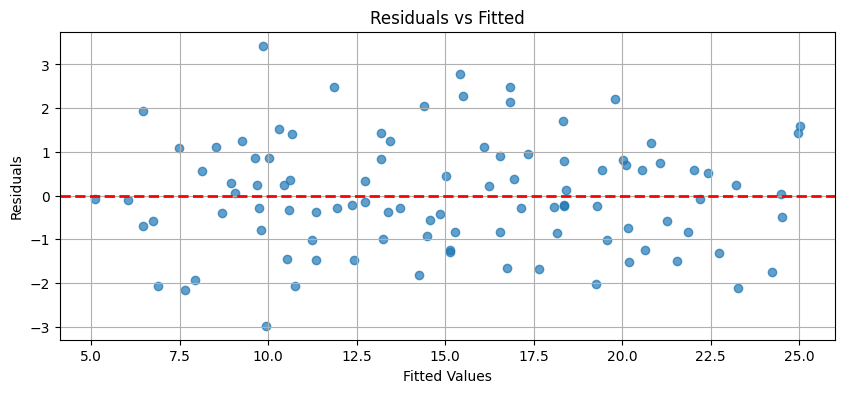

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid()
plt.show()

In [17]:
y_range = (y.min(), y.max())

print(f"Range of Target Y: {y_range}")

Range of Target Y: (4.814051147355016, 26.59646765346142)


$\text{From the residual Plot it can be Seen that, we've got a good fit !}$
<br>
<br>
$\text{Let's Check For MAPE}$

In [18]:
def calculate_mape(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    return np.mean(np.abs((actual - predicted) / actual)) * 100

calculate_mape(y, y_pred)

8.07286134394239

$\text{Predicted values are about 9.34% away from the actual values which is quite good}$
